In [19]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [76]:
def func(t, u, derivadas):
    resultado = []
    for i in derivadas:
        resultado.append(i(t, u))
    return resultado

In [95]:
def Euler_exp(derivadas, vIniciais, h, intervalo):
    n = int((intervalo[1]-intervalo[0])/h)
    x = np.linspace(intervalo[0], intervalo[1], n)
    aprox = []
    aprox.append(vIniciais)
    
    for i in range(0, n):
        resultado = []
        derResult = func(x[i], aprox[i], derivadas)
        for j in range(0, len(derResult)):
            resultado.append(aprox[i][j] + h*derResult[j])
        aprox.append(resultado)

    
    return np.array(aprox).T

In [102]:
def rungeKuttaMod(derivadas, vIniciais, h, intervalo):
    n = int((intervalo[1]-intervalo[0])/h)
    x = np.linspace(intervalo[0], intervalo[1], n)
    aprox = []
    aprox.append(vIniciais)

    for i in range(0, n):
        k1 = []
        k2 = []
        resultados = []
        k1 = func(x[i], aprox[i], derivadas)
        for j in range(0, len(k1)):
            k1[j] = aprox[i][j] + (1/2)*h*k1[j]
        k2 = func(x[i]+(h/2), k1, derivadas)
        for j in range(0, len(k2)):
            resultados.append(k2[j]*h+aprox[i][j])
        aprox.append(resultados)
    
    return np.array(aprox).T
   
    


In [114]:
def rungeKuttaMelhorado(derivadas, vIniciais, h, intervalo):
    n = int((intervalo[1]-intervalo[0])/h)
    x = np.linspace(intervalo[0], intervalo[1], n)
    aprox = []
    aprox.append(vIniciais)

    for i in range(0, n):
        k1 = []
        k2 = []
        aux = []
        resultados = []
        k1 = func(x[i], aprox[i], derivadas)
        for j in range(0, len(k1)):
            aux.append(aprox[i][j] + h*k1[j])
        k2 = func(x[i]+h, aux, derivadas)
        for j in range(0, len(k2)):
            resultados.append((k1[j]+k2[j])*(h/2) + aprox[i][j])
        aprox.append(resultados)
    
    return np.array(aprox).T

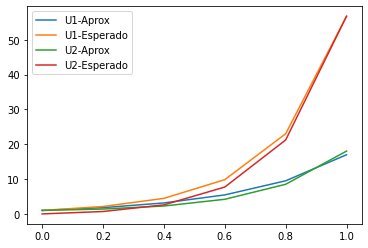

In [96]:
dU1 = lambda t, u: 3*u[0] + 2*u[1] - (2*t**2 + 1) * math.e**t
dU2 = lambda t, u: 4*u[0] + 2*u[1] + (t**2 + 2*t -4) * math.e**(2*t)

u1 = lambda t: (1/3)*math.e**(5*t) - (1/3)*math.e**(-t) + math.e**(2*t)
u2 = lambda t: (1/3)*math.e**(5*t) - (1/3)*math.e**(-t) + t**(2) * math.e**(2*t)

derivadas = [dU1, dU2]
vIniciais = [1, 1]

r = Euler_exp(derivadas, vIniciais, 0.2, [0.0, 1.0])

r2 = []

r3 = []

x = np.linspace(0.0, 1.0, 6)

for i in x:
    r2.append(u1(i))


for i in x:
    r3.append(u2(i))

plt.plot(x, r[0], label='U1-Aprox')
plt.plot(x, r2, label='U1-Esperado')
plt.plot(x, r[1], label='U2-Aprox')
plt.plot(x, r3, label='U2-Esperado')
plt.legend()
plt.show()

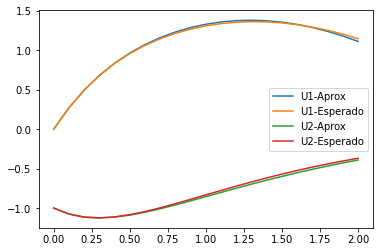

In [ ]:
dU1 = lambda t, u: -4*u[0] - 2*u[1] + math.cos(t) + 4*math.sin(t)
dU2 = lambda t, u: 3*u[0] + u[1] - 3*math.sin(t)

u1 = lambda t: 2*math.e**(-t) - 2*math.e**(-2*t) + math.sin(t)
u2 = lambda t: (-3)*math.e**(-t) + (2)*math.e**(-2*t)

derivadas = [dU1, dU2]
vIniciais = [0, -1]

r = rungeKuttaMelhorado(derivadas, vIniciais, 0.1, [0.0, 2.0])

r2 = []

r3 = []

x = np.linspace(0.0, 2.0, 21)

for i in x:
    r2.append(u1(i))


for i in x:
    r3.append(u2(i))

plt.plot(x, r[0], label='U1-Aprox')
plt.plot(x, r2, label='U1-Esperado')
plt.plot(x, r[1], label='U2-Aprox')
plt.plot(x, r3, label='U2-Esperado')
plt.legend()
plt.show()